In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile

zip_path = "/content/drive/MyDrive/YZTAAlzehimer/raw_vad.zip"
extract_path = "/content/raw_vad"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("ZIP dosyası başarıyla çıkarıldı!")

ZIP dosyası başarıyla çıkarıldı!


In [5]:
import os

for root, dirs, files in os.walk("raw_vad"):
    print(f"Klasör: {root}")
    print(f"Alt klasörler: {dirs}")
    print(f"Dosya sayısı: {len(files)}")
    print("-"*40)

Klasör: raw_vad
Alt klasörler: ['raw_vad']
Dosya sayısı: 0
----------------------------------------
Klasör: raw_vad/raw_vad
Alt klasörler: ['AD', 'HC', 'MCI']
Dosya sayısı: 0
----------------------------------------
Klasör: raw_vad/raw_vad/AD
Alt klasörler: []
Dosya sayısı: 79
----------------------------------------
Klasör: raw_vad/raw_vad/HC
Alt klasörler: []
Dosya sayısı: 108
----------------------------------------
Klasör: raw_vad/raw_vad/MCI
Alt klasörler: []
Dosya sayısı: 93
----------------------------------------


In [6]:
import glob

hc_files = glob.glob("raw_vad/raw_vad/HC/*.wav")
print(f"HC klasöründe toplam {len(hc_files)} dosya var.")
print("İlk 3 dosya örneği:")
print(hc_files[:3])

HC klasöründe toplam 108 dosya var.
İlk 3 dosya örneği:
['raw_vad/raw_vad/HC/HC_F_122302_012.wav', 'raw_vad/raw_vad/HC/HC_F_019242_002.wav', 'raw_vad/raw_vad/HC/HC_F_019204_002.wav']


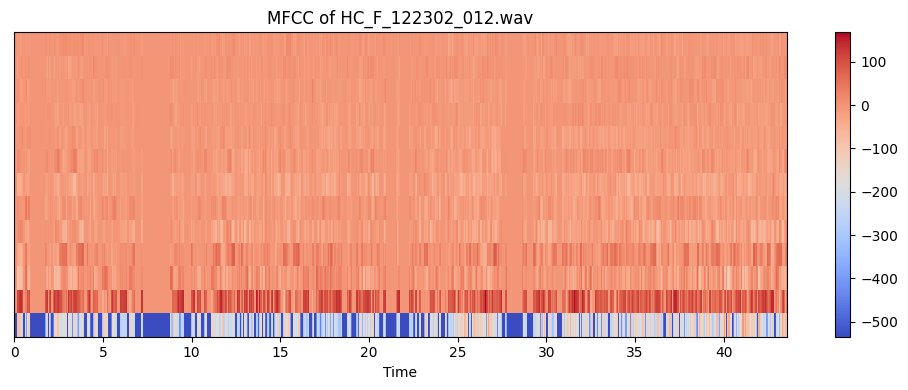

In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

file_path = hc_files[0]

# Ses dosyasını yükle
y, sr = librosa.load(file_path, sr=None)

# MFCC çıkar
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# MFCC görselleştir
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC of ' + file_path.split('/')[-1])
plt.tight_layout()
plt.show()

In [8]:
import librosa
from IPython.display import Audio

In [9]:
file_path = "raw_vad/raw_vad/HC/HC_F_019202_001.wav"

# Librosa ile oku
signal, sr = librosa.load(file_path, sr=None)  # sr=None gerçek sampling rate'i korur

# Sesin süresi
print(f"Uzunluk: {len(signal)/sr:.2f} saniye, Örnekleme oranı: {sr} Hz")

# Ses dosyasını çal
Audio(data=signal, rate=sr)

Uzunluk: 60.00 saniye, Örnekleme oranı: 16000 Hz


In [10]:
import glob

hc_files = glob.glob("raw_vad/raw_vad/HC/*.wav")
print(f"HC klasöründe toplam {len(hc_files)} dosya var.")
print(f"İlk dosya örneği: {hc_files[0]}")

HC klasöründe toplam 108 dosya var.
İlk dosya örneği: raw_vad/raw_vad/HC/HC_F_122302_012.wav


In [11]:
import librosa
import numpy as np

file_path = hc_files[0]
y, sr = librosa.load(file_path, sr=None)
print(f"Sample rate: {sr}")
print(f"Duration: {len(y)/sr:.2f} saniye")

# MFCC çıkarımı
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
mfccs_mean = np.mean(mfccs, axis=1)
print("MFCC ortalamaları:", mfccs_mean)

Sample rate: 16000
Duration: 60.00 saniye
MFCC ortalamaları: [-293.1765      60.19448     -4.45632     10.937403   -14.811832
   -4.664604   -17.056818    -4.4564047   -8.346911    -5.1349382
   -4.9308615   -1.5003781   -3.0991604]


In [12]:
import pandas as pd

features_list = []
for file in hc_files:
    y, sr = librosa.load(file, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs, axis=1)
    features_list.append(mfccs_mean)

df_hc = pd.DataFrame(features_list, columns=[f'mfcc_{i+1}' for i in range(13)])
print(df_hc.head())

       mfcc_1     mfcc_2     mfcc_3     mfcc_4     mfcc_5     mfcc_6  \
0 -293.176514  60.194481  -4.456320  10.937403 -14.811832  -4.664604   
1 -384.119385  49.534824   6.949465  -8.607727 -12.514651 -10.342874   
2 -374.102997  31.556644  16.713900   5.979165   1.030584  -1.612827   
3 -423.336884  61.814140 -21.015448   0.056759  -8.696187 -10.972754   
4 -434.534637  32.777763  17.377451   9.030910  -0.287760  -3.047235   

      mfcc_7     mfcc_8    mfcc_9   mfcc_10    mfcc_11    mfcc_12   mfcc_13  
0 -17.056818  -4.456405 -8.346911 -5.134938  -4.930861  -1.500378 -3.099160  
1 -10.505697 -10.605229 -1.976246 -7.761344 -12.764285 -10.498035 -9.759660  
2  -2.199531   4.508059 -4.137337  0.953199  -3.772507  -1.663592 -1.690063  
3 -17.429661  -6.477512 -8.122654 -6.812912  -7.235619  -5.831051 -3.054763  
4  -0.432656  -0.170579 -3.056107 -0.777456  -4.524353  -1.283446 -1.473391  


In [ ]:
print(len(df_hc))

108


In [13]:
import glob
import pandas as pd
import librosa
import numpy as np

def extract_mfcc_features(folder_path, label):
    files = glob.glob(folder_path + "/*.wav")
    features = []
    for file in files:
        y, sr = librosa.load(file, sr=None)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfccs_mean = np.mean(mfccs, axis=1)
        features.append(mfccs_mean)
    df = pd.DataFrame(features, columns=[f'mfcc_{i+1}' for i in range(13)])
    df['label'] = label
    return df

df_hc = extract_mfcc_features("raw_vad/raw_vad/HC", 0)  # Healthy Control
df_ad = extract_mfcc_features("raw_vad/raw_vad/AD", 1)  # Alzheimer Disease
df_mci = extract_mfcc_features("raw_vad/raw_vad/MCI", 2)  # Mild Cognitive Impairment

# Tüm verileri birleştir
df_all = pd.concat([df_hc, df_ad, df_mci], ignore_index=True)
print(f"Toplam örnek sayısı: {len(df_all)}")
print(df_all['label'].value_counts())

Toplam örnek sayısı: 280
label
0    108
2     93
1     79
Name: count, dtype: int64


In [14]:
!pip install praat-parselmouth


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 33.8 MB/s eta 0:00:00


In [ ]:
import parselmouth

snd = parselmouth.Sound("raw_vad/raw_vad/HC/HC_F_122302_012.wav")

# 3 argümanlı deneme
try:
    pp = parselmouth.praat.call(snd, "To PointProcess (periodic, cc)", 75, 500, 0.03)
    print("3 argümanlı çağrı başarılı")
except Exception as e:
    print(f"3 argümanlı çağrı hata: {e}")

# 2 argümanlı deneme
try:
    pp = parselmouth.praat.call(snd, "To PointProcess (periodic, cc)", 75, 500)
    print("2 argümanlı çağrı başarılı")
except Exception as e:
    print(f"2 argümanlı çağrı hata: {e}")

# 4 argümanlı deneme
try:
    pp = parselmouth.praat.call(snd, "To PointProcess (periodic, cc)", 75, 500, 0.03, 0.1)
    print("4 argümanlı çağrı başarılı")
except Exception as e:
    print(f"4 argümanlı çağrı hata: {e}")


3 argümanlı çağrı hata: Command requires only 2 arguments, not the 3 given.
2 argümanlı çağrı başarılı
4 argümanlı çağrı hata: Command requires only 2 arguments, not the 4 given.


In [15]:
import os
import parselmouth

# HC klasörünün yolu
folder_path = "raw_vad/raw_vad/HC"

# Klasördeki tüm .wav dosyalarını al
wav_files = [f for f in os.listdir(folder_path) if f.endswith(".wav")]

# Her .wav dosyasını sırayla işle
for file_name in wav_files:
    file_path = os.path.join(folder_path, file_name)

    try:
        snd = parselmouth.Sound(file_path)
        point_process = parselmouth.praat.call(snd, "To PointProcess (periodic, cc)", 75, 500)
        print(f"{file_name} dosyası başarıyla analiz edildi.")

        # Burada analiz sonuçlarını işleyebilirsin (örnek: jitter, shimmer hesaplama vs.)

    except Exception as e:
        print(f"{file_name} dosyasında hata oluştu: {e}")


HC_F_122302_012.wav dosyası başarıyla analiz edildi.
HC_F_019242_002.wav dosyası başarıyla analiz edildi.
HC_F_019204_002.wav dosyası başarıyla analiz edildi.
HC_M_019223_002.wav dosyası başarıyla analiz edildi.
HC_F_019202_003.wav dosyası başarıyla analiz edildi.
HC_F_261225_001.wav dosyası başarıyla analiz edildi.
HC_F_019246_002.wav dosyası başarıyla analiz edildi.
HC_F_019215_002.wav dosyası başarıyla analiz edildi.
HC_M_019203_005.wav dosyası başarıyla analiz edildi.
HC_F_019242_005.wav dosyası başarıyla analiz edildi.
HC_F_121225_001.wav dosyası başarıyla analiz edildi.
HC_M_019221_002.wav dosyası başarıyla analiz edildi.
HC_F_019225_002.wav dosyası başarıyla analiz edildi.
HC_F_019242_004.wav dosyası başarıyla analiz edildi.
HC_F_062619_001.wav dosyası başarıyla analiz edildi.
HC_F_019207_001.wav dosyası başarıyla analiz edildi.
HC_F_019207_004.wav dosyası başarıyla analiz edildi.
HC_M_262520_001.wav dosyası başarıyla analiz edildi.
HC_M_019217_003.wav dosyası başarıyla analiz e

In [17]:
jitter = parselmouth.praat.call(point_process, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3)
shimmer = parselmouth.praat.call([snd, point_process], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
hnr = parselmouth.praat.call(snd, "To Harmonicity (cc)", 0.01, 75, 0.1, 1.0)
hnr_value = parselmouth.praat.call(hnr, "Get mean", 0, 0)


In [18]:
import numpy as np

# Örnek: MFCC ortalamaları alınıyor (örneğin 13 MFCC)
mfcc_mean = np.mean(mfccs.T, axis=0)

# Diğer özellikleri ekle
features = np.hstack([mfcc_mean, jitter, shimmer, hnr_value])


In [28]:
import os
import numpy as np
import pandas as pd
import parselmouth

def extract_features(path):
    sound = parselmouth.Sound(path)
    mfcc = sound.to_mfcc(number_of_coefficients=13)
    mfcc_array = mfcc.to_array()
    mfcc_mean = np.mean(mfcc_array.T, axis=0)
    pitch = sound.to_pitch()
    pointProcess = parselmouth.praat.call([sound, pitch], "To PointProcess (cc)")

    jitter = parselmouth.praat.call(pointProcess, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3)
    shimmer = parselmouth.praat.call([sound, pointProcess], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    hnr = parselmouth.praat.call(sound, "To Harmonicity (cc)", 0.01, 75, 0.1, 1.0)
    hnr_value = parselmouth.praat.call(hnr, "Get mean", 0, 0)

    print(f"mfcc_mean shape: {mfcc_mean.shape}, jitter: {jitter}, shimmer: {shimmer}, hnr_value: {hnr_value}")
    features = np.hstack([mfcc_mean, jitter, shimmer, hnr_value])
    print(f"Features length: {len(features)}")
    return features

# HC klasörü içindeki tüm dosyalar için özellik çıkar
features_list = []
data_dir ="raw_vad/raw_vad/HC"  # Klasör ismini gerektiğinde değiştir
for filename in os.listdir(data_dir):
    if filename.endswith(".wav"):
        path = os.path.join(data_dir, filename)
        features = extract_features(path)
        features_list.append(features)

# DataFrame'e çevir
columns = [f'mfcc_{i+1}' for i in range(14)] + ['jitter', 'shimmer', 'hnr']
features_df = pd.DataFrame(features_list, columns=columns)

# CSV'ye kaydet
features_df.to_csv("hc_features.csv", index=False)


mfcc_mean shape: (14,), jitter: 0.018729276316010925, shimmer: 0.13196374168238983, hnr_value: 9.39298288172509
Features length: 17
mfcc_mean shape: (14,), jitter: 0.01820758478940446, shimmer: 0.09581570492913495, hnr_value: 13.393387900881573
Features length: 17
mfcc_mean shape: (14,), jitter: 0.026208102977541312, shimmer: 0.1349644255485653, hnr_value: 9.365249159137784
Features length: 17
mfcc_mean shape: (14,), jitter: 0.027709605090851894, shimmer: 0.15596627534330074, hnr_value: 10.657340502334314
Features length: 17
mfcc_mean shape: (14,), jitter: 0.02981859671351926, shimmer: 0.12595190408880047, hnr_value: 11.444229794233667
Features length: 17
mfcc_mean shape: (14,), jitter: 0.02915898408545144, shimmer: 0.16841516466703804, hnr_value: 7.727734585392817
Features length: 17
mfcc_mean shape: (14,), jitter: 0.02813243524881125, shimmer: 0.1398637388163056, hnr_value: 10.667720435635324
Features length: 17
mfcc_mean shape: (14,), jitter: 0.03267707817021511, shimmer: 0.14149698

# MFCC and Ext. for AD Dataset

In [30]:
import os
import numpy as np
import pandas as pd
import parselmouth

def extract_features(path):
    sound = parselmouth.Sound(path)
    mfcc = sound.to_mfcc(number_of_coefficients=13)
    mfcc_array = mfcc.to_array()
    mfcc_mean = np.mean(mfcc_array.T, axis=0)
    pitch = sound.to_pitch()
    pointProcess = parselmouth.praat.call([sound, pitch], "To PointProcess (cc)")

    jitter = parselmouth.praat.call(pointProcess, "Get jitter (local)", 0, 0, 0.0001, 0.02, 1.3)
    shimmer = parselmouth.praat.call([sound, pointProcess], "Get shimmer (local)", 0, 0, 0.0001, 0.02, 1.3, 1.6)
    hnr = parselmouth.praat.call(sound, "To Harmonicity (cc)", 0.01, 75, 0.1, 1.0)
    hnr_value = parselmouth.praat.call(hnr, "Get mean", 0, 0)

    return np.hstack([mfcc_mean, jitter, shimmer, hnr_value])

# AD klasörü yolu
ad_dir = "raw_vad/raw_vad/AD"

features_list = []
for filename in os.listdir(ad_dir):
    if filename.endswith(".wav"):
        path = os.path.join(ad_dir, filename)
        try:
            features = extract_features(path)
            features_list.append(features)
            print(f"{filename} başarıyla işlendi.")
        except Exception as e:
            print(f"{filename} işleminde hata: {e}")

# DataFrame oluştur
columns = [f'mfcc_{i+1}' for i in range(14)] + ['jitter', 'shimmer', 'hnr']
features_df = pd.DataFrame(features_list, columns=columns)

# CSV olarak kaydet
features_df.to_csv("ad_features.csv", index=False)
print("AD özellikleri başarıyla kaydedildi.")


AD_F_040108_011.wav başarıyla işlendi.
AD_F_040108_005.wav başarıyla işlendi.
AD_F_040108_018.wav başarıyla işlendi.
AD_F_100426_001.wav başarıyla işlendi.
AD_F_040108_047.wav başarıyla işlendi.
AD_F_040108_039.wav başarıyla işlendi.
AD_F_040108_009.wav başarıyla işlendi.
AD_F_040108_028.wav başarıyla işlendi.
AD_M_230706_001.wav başarıyla işlendi.
AD_M_040259_001.wav başarıyla işlendi.
AD_F_040108_014.wav başarıyla işlendi.
AD_F_040108_040.wav başarıyla işlendi.
AD_M_040359_003.wav başarıyla işlendi.
AD_F_040108_008.wav başarıyla işlendi.
AD_F_040326_001.wav başarıyla işlendi.
AD_F_040108_004.wav başarıyla işlendi.
AD_F_040108_006.wav başarıyla işlendi.
AD_F_040108_034.wav başarıyla işlendi.
AD_F_040108_033.wav başarıyla işlendi.
AD_M_040363_001.wav başarıyla işlendi.
AD_F_040349_001.wav başarıyla işlendi.
AD_F_040108_035.wav başarıyla işlendi.
AD_F_040398_001.wav başarıyla işlendi.
AD_F_040299_001.wav başarıyla işlendi.
AD_F_040108_021.wav başarıyla işlendi.
AD_F_232526_001.wav başar

# # MFCC and Ext. for MCI  Dataset

In [32]:

# MCI klasörü yolu
mci_dir = "raw_vad/raw_vad/MCI"

features_list = []
for filename in os.listdir(mci_dir):
    if filename.endswith(".wav"):
        path = os.path.join(mci_dir, filename)
        try:
            features = extract_features(path)
            features_list.append(features)
            print(f"{filename} başarıyla işlendi.")
        except Exception as e:
            print(f"{filename} işleminde hata: {e}")

# DataFrame oluştur
columns = [f'mfcc_{i+1}' for i in range(14)] + ['jitter', 'shimmer', 'hnr']
features_df = pd.DataFrame(features_list, columns=columns)

# CSV olarak kaydet
features_df.to_csv("mci_features.csv", index=False)
print("MCI özellikleri başarıyla kaydedildi.")


MCI_M_122503_001.wav başarıyla işlendi.
MCI_F_231912_001.wav başarıyla işlendi.
MCI_M_082412_001.wav başarıyla işlendi.
MCI_F_101206_003.wav başarıyla işlendi.
MCI_F_080312_002.wav başarıyla işlendi.
MCI_M_120712_002.wav başarıyla işlendi.
MCI_F_072313_001.wav başarıyla işlendi.
MCI_F_120826_003.wav başarıyla işlendi.
MCI_F_040381_004.wav başarıyla işlendi.
MCI_F_251008_001.wav başarıyla işlendi.
MCI_M_100900_001.wav başarıyla işlendi.
MCI_M_080612_002.wav başarıyla işlendi.
MCI_M_030708_001.wav başarıyla işlendi.
MCI_M_100900_002.wav başarıyla işlendi.
MCI_F_071913_001.wav başarıyla işlendi.
MCI_M_080612_001.wav başarıyla işlendi.
MCI_F_101206_002.wav başarıyla işlendi.
MCI_M_070600_001.wav başarıyla işlendi.
MCI_F_191606_002.wav başarıyla işlendi.
MCI_M_061901_001.wav başarıyla işlendi.
MCI_F_120826_001.wav başarıyla işlendi.
MCI_M_252308_002.wav başarıyla işlendi.
MCI_M_061901_002.wav başarıyla işlendi.
MCI_F_122310_002.wav başarıyla işlendi.
MCI_M_070600_002.wav başarıyla işlendi.


# Bütün CSV Dosyalarını Birleştirme

In [33]:
hc_df = pd.read_csv("hc_features.csv")
ad_df = pd.read_csv("ad_features.csv")
mci_df = pd.read_csv("mci_features.csv")

# Etiketleri ekle
hc_df['label'] = 0
mci_df['label'] = 1
ad_df['label'] = 2

# Hepsini birleştir
combined_df = pd.concat([hc_df, mci_df, ad_df], ignore_index=True)

# Karıştır
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Kaydet
combined_df.to_csv("all_features_labeled.csv", index=False)
print("Tüm veriler başarıyla birleştirildi ve etiketlendi.")

Tüm veriler başarıyla birleştirildi ve etiketlendi.


#

Accuracy: 0.7142857142857143

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.76      0.70        21
           1       0.79      0.65      0.71        23
           2       0.75      0.75      0.75        12

    accuracy                           0.71        56
   macro avg       0.73      0.72      0.72        56
weighted avg       0.72      0.71      0.71        56

Confusion Matrix:


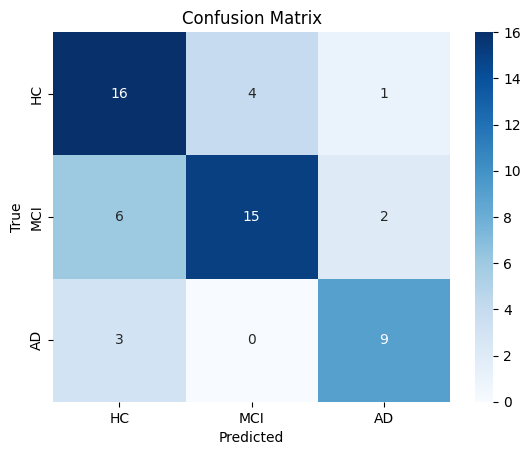

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Veriyi oku
df = pd.read_csv("all_features_labeled.csv")

# 2. Özellikler ve etiketleri ayır
X = df.drop("label", axis=1)
y = df["label"]

# 3. Eğitim ve test kümelerine ayır (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Model oluştur ve eğit
model = RandomForestClassifier(n_estimators=250, random_state=42)
model.fit(X_train, y_train)

# 5. Test kümesi üzerinde tahmin yap
y_pred = model.predict(X_test)

# 6. Performans ölçümleri
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["HC", "MCI", "AD"], yticklabels=["HC", "MCI", "AD"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Parametre aralıklarını tanımla
param_grid = {
    'n_estimators': [100, 150, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Random Forest sınıflandırıcısı
rf_clf = RandomForestClassifier(random_state=42)

# GridSearchCV nesnesi
grid_search = GridSearchCV(estimator=rf_clf,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='accuracy')

# Modeli eğit
grid_search.fit(X_train, y_train)

# En iyi parametreleri yazdır
print("En iyi parametreler:")
print(grid_search.best_params_)

# En iyi modeli test verisi üzerinde değerlendir
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
183 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/uti

En iyi parametreler:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.7321428571428571

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.76      0.71        21
           1       0.80      0.70      0.74        23
           2       0.75      0.75      0.75        12

    accuracy                           0.73        56
   macro avg       0.74      0.74      0.74        56
weighted avg       0.74      0.73      0.73        56



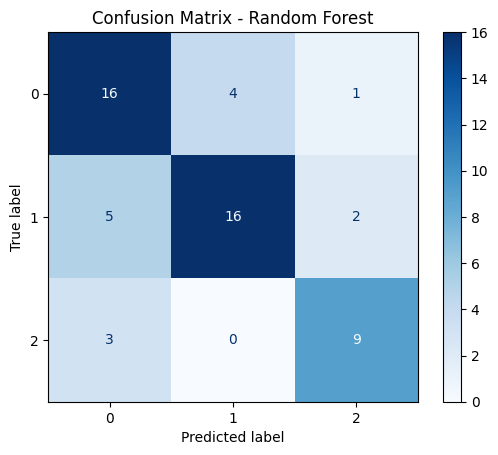

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

We will use Random Forest

Accuracy: 0.7321428571428571

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.76      0.71        21
           1       0.80      0.70      0.74        23
           2       0.75      0.75      0.75        12

    accuracy                           0.73        56
   macro avg       0.74      0.74      0.74        56
weighted avg       0.74      0.73      0.73        56



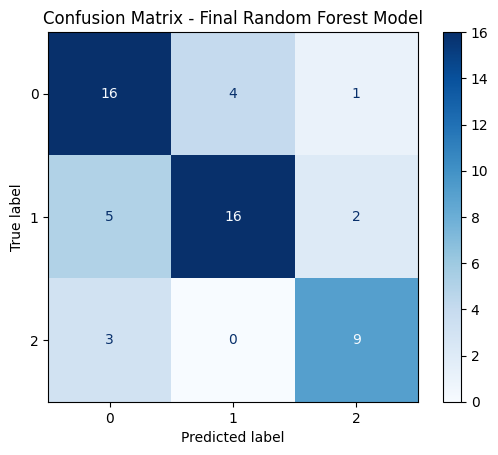

In [40]:
from sklearn.ensemble import RandomForestClassifier

best_rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

best_rf_model.fit(X_train, y_train)


from sklearn.metrics import classification_report, accuracy_score

y_pred = best_rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(best_rf_model, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix - Final Random Forest Model")
plt.show()